Import necessary libraries and functions.

In [1]:
import numpy as np, cmath,scipy as sp
import scipy.io
from matplotlib import pyplot as plt

from numpy import pi, sin, cos, exp, sqrt, log, random, angle  #import basic functions from numpy that we'll need
from numpy.fft import fft, ifft

%matplotlib inline

Import optional library for prettier plots.

In [2]:
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

###Figure 13.1

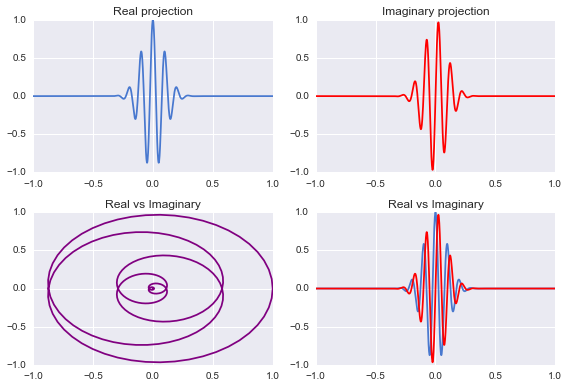

In [3]:
#parameters

srate = 500. #sampling rate in Hz
f = 10. #frequency of wavelet in Hz
time = np.arange(-1,1+1/srate,1/srate)

s = 6/(2*pi*f) # standard deviation for wavelet

wavelet = exp(2*pi*1j*f*time) * exp(-time**2/(2*s**2)) #multiple complex sinewave by gaussian to make morlet wavelet


plt.subplot(221)
plt.plot(time,np.real(wavelet))
plt.xlim([-1,1])
plt.title("Real projection")


plt.subplot(222)
plt.plot(time,np.imag(wavelet),'r')
plt.xlim([-1,1])
plt.title("Imaginary projection")


plt.subplot(223)
plt.plot(np.real(wavelet),np.imag(wavelet),'purple')
plt.title("Real vs Imaginary")

plt.subplot(224)
plt.plot(time,np.real(wavelet))
plt.plot(time,np.imag(wavelet),'r')
plt.xlim([-1,1])
plt.title("Real vs Imaginary")

plt.tight_layout()

###Figure 13.2

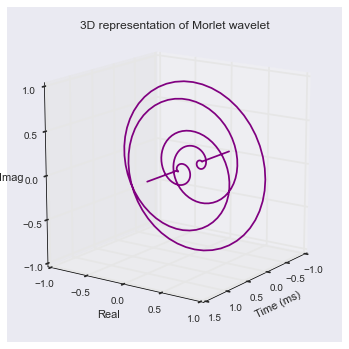

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
ax.plot(time,np.real(wavelet),zs=np.imag(wavelet),color='purple')
ax.view_init(15,35)
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Real')
ax.set_zlabel('Imag')
_=plt.title("3D representation of Morlet wavelet")

###movie
This block plots live figures

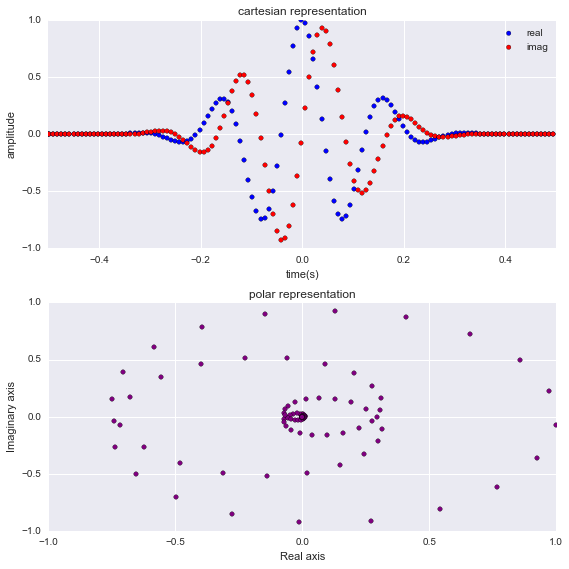

In [5]:
from IPython import display

frequency = 6. #frequency of sine wave
srate = 500. 
time = np.arange(-.5,0.5+1/srate,1/srate)


#create the complex wavelet
wavelet = exp(2*1j*pi*frequency*time) * exp(-time**2/(2*(4/(2*pi*frequency))**2))

f, axes = plt.subplots(2, 1)
f.set_size_inches(8, 8)


#set up top row of data (real and imaginary in cartesian plot)
cplotR = axes[0].scatter(time[0],np.real(wavelet[0]),c='b')
cplotI = axes[0].scatter(time[0],np.imag(wavelet[0]),c='r')
axes[0].axis([time[0],time[-1],-1,1])

axes[0].set_title("cartesian representation")
axes[0].set_ylabel("amplitude")
axes[0].set_xlabel("time(s)")
axes[0].legend(["real","imag"])


#set up bottom row of data (polar presentation)
pplot = axes[1].scatter(np.real(wavelet[0]),np.imag(wavelet[0]),c='purple')
plt.axis([-1,1,-1,1])
plt.xlabel("Real axis")
plt.ylabel("Imaginary axis")
plt.title("polar representation")
plt.tight_layout()


timeskip = 4 #if computer is slow, change this to higher number

for ti in np.arange(1,len(time),timeskip):
    try:
       
        display.clear_output(wait=True)
                
        
        #update cartesian plots
        axes[0].scatter(time[ti],np.real(wavelet[ti]),c='b')
        axes[0].scatter(time[ti],np.imag(wavelet[ti]),c='r')
        
        #update polar plot
        axes[1].scatter(np.real(wavelet[ti]),np.imag(wavelet[ti]),c='purple')

        display.display(plt.gcf())

    except Exception as e:   
        break
        
f.clear()


###Figure 13.4

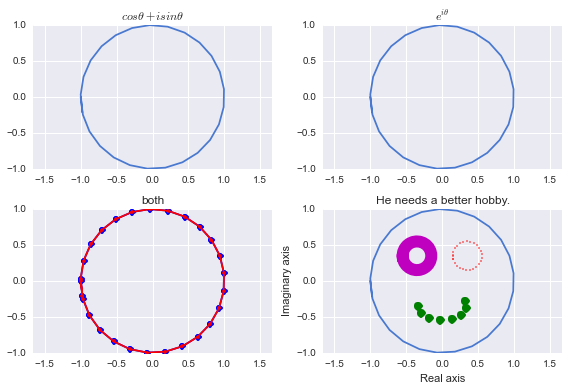

In [6]:
time = np.arange(-pi,pi+.25,.25)

plt.subplot(221)
plt.plot(np.real(cos(time) + 1j*sin(time)),np.imag(cos(time) + 1j*sin(time)))
_=plt.axis("equal")
plt.title(r"$cos\theta + i sin\theta$")

#Using Euler's formula
plt.subplot(222)
plt.plot(np.real(exp(1j*time)),np.imag(exp(1j*time)))
_=plt.axis("equal")
plt.title(r"$e^{i\theta}$")

plt.subplot(223)
plt.plot(np.real(cos(time) + 1j*sin(time)),np.imag(cos(time) + 1j*sin(time)),'bo-')
plt.plot(np.real(exp(1j*time)),np.imag(exp(1j*time)),'r.-')
plt.title("both")
plt.axis("equal")


plt.subplot(224)
face = cos(time)+1j*sin(time)
plt.plot(np.real(face),np.imag(face)) #plot face
leftEye = (-.35+cos(time)/5) + 1j*(.35+sin(time)/5)
plt.plot( np.real(leftEye),np.imag(leftEye),'m',linewidth = 12) #left eye
rightEye = (+.35+cos(time)/5) + 1j*(.35+sin(time)/5)
plt.plot(np.real(rightEye),np.imag(rightEye)  ,'r.',markersize=3) #right eye
smile = np.arange(-pi,0+0.5,0.5)
mouth = (cos(smile)/3) + 1j*(-.35+sin(smile)/5)
plt.plot(np.real(mouth),np.imag(mouth)  ,'go',markersize=9) #mouth
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.axis("equal")
plt.title('He needs a better hobby.')

plt.tight_layout()

###Figure 13.5

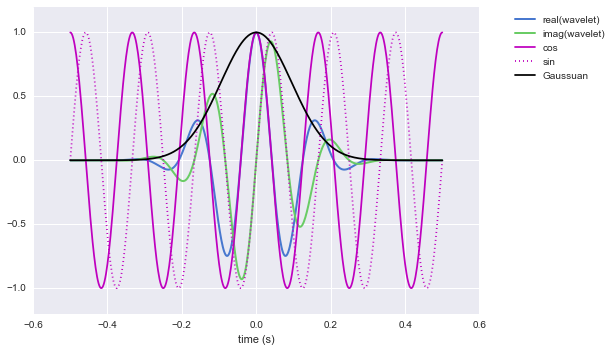

In [7]:
time = np.arange(-.5,.5+1/srate,1/srate)

#plot real and imaginary parts of wavelet

plt.plot(time,np.real(wavelet),linewidth = 2)
plt.plot(time,np.imag(wavelet),linewidth = 2)

#plot cosine and sine

plt.plot(time,cos(2*pi*frequency*time),'m')
plt.plot(time,sin(2*pi*frequency*time),'m:')

#plot gaussian window

gaus_win = exp(-time**2/(2*s**2))
plt.plot(time,gaus_win,'k')
plt.ylim([-1.2,1.2])
plt.xlabel("time (s)")
plt.legend(["real(wavelet)","imag(wavelet)","cos","sin","Gaussuan"], bbox_to_anchor = [1.3, 1])


###Figure 13.6

In [8]:
data = scipy.io.loadmat('sampleEEGdata')
EEGdata = data["EEG"][0,0]["data"]
EEGpnts = data["EEG"][0,0]["pnts"][0,0] #number of points in EEG data
EEGtimes = data["EEG"][0,0]["times"][0]
EEGsrate = float(data["EEG"][0,0]["srate"][0]) #make float for division purposes later
EEGtrials = data["EEG"][0,0]["trials"][0,0]

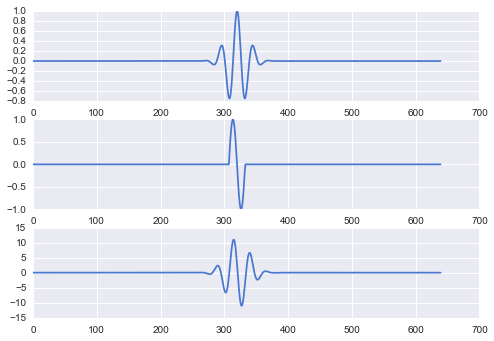

In [9]:
time = np.arange( -1*EEGpnts/EEGsrate/2., EEGpnts/EEGsrate/2. , 1/EEGsrate)
f = 10. #frequency in Hz
s = 4/(2*pi*f)
wavelet = exp(1j*2*pi*f*time) * exp(-time **2 /(2*s**2))

#signal is one sine cycle
timeS = np.arange(0,1/f,1/EEGsrate)
signal = sin(2*pi*f*timeS)

#zero-pad the signal
zz= np.zeros(EEGpnts/2 - len(timeS)/2)
signal = np.concatenate([zz,signal,zz])


plt.subplot(311)
plt.plot(np.real(wavelet))

plt.subplot(312)
plt.plot(signal)

plt.subplot(313)
_=plt.plot(np.real(np.convolve(wavelet,signal,mode="same")))

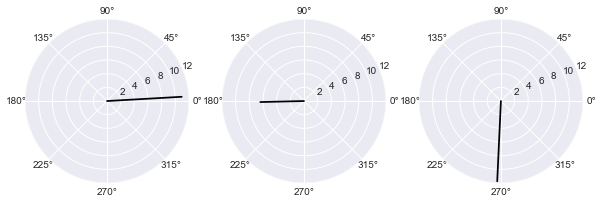

In [10]:
#now plot dot products at selected phase lags, corresponding to the above 3 plots

fig, axarr = plt.subplots(1, 3, subplot_kw=dict(polar=True))
fig.set_size_inches(10, 10.5)

axarr[0].plot(0,12,'-k')
dp = np.sum(wavelet[np.round(100/f)-3:]*signal[:-np.round(100/f)+3])
axarr[0].plot([angle(dp),angle(dp)],[0,np.abs(dp)],'-k')

axarr[1].plot(0,12,'-k')
dp = np.sum(wavelet[2.3*np.round(100/f)-3:]*signal[:-np.round(2.3*(100/f))+3])
axarr[1].plot([angle(dp),angle(dp)],[0,np.abs(dp)],'-k')

axarr[2].plot(0,12,'-k')
dp = np.sum(wavelet*signal);
_=axarr[2].plot([angle(dp),angle(dp)],[0,np.abs(dp)],'-k')

###Figure 13.8

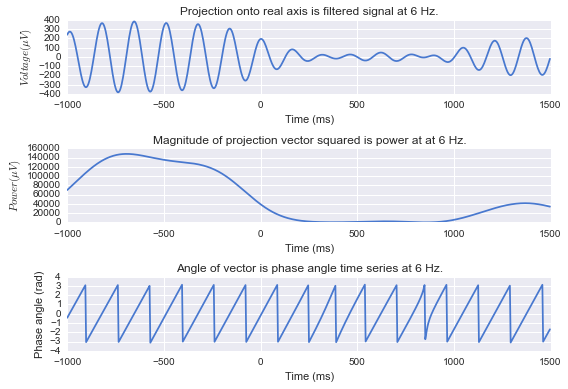

In [11]:
frequency = 6 #in Hz
time = np.arange(-1,1 + 1/EEGsrate,1/EEGsrate)
s = (4/(2*pi*frequency))**2 #s squared here rather than next line
wavelet = exp(2*1j*pi*frequency*time) * exp(-time**2./(2*s)/frequency)

#fft parameters
n_wavelet = len(wavelet)
n_data = EEGpnts
n_convolution = n_wavelet + n_data-1
half_of_wavelet_size = (len(wavelet)-1)/2.

#fft of wavelet and eeg data
fft_wavelet = fft(wavelet,n_convolution)
fft_data = fft(np.squeeze(EEGdata[46,:,0]),n_convolution)# FCz, trial 1

convolution_result_fft = ifft(fft_wavelet*fft_data,n_convolution)

#cut off edges
convolution_result_fft = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size]

#plot for comparison
plt.subplot(311)
plt.plot(EEGtimes,np.real(convolution_result_fft))
plt.xlabel('Time (ms)')
plt.ylabel(r'$Voltage (\mu V)$')
plt.title( 'Projection onto real axis is filtered signal at ' + str(frequency) + ' Hz.' )

plt.subplot(312)
plt.plot(EEGtimes,np.absolute(convolution_result_fft)**2)
plt.xlabel('Time (ms)')
plt.ylabel(r'$Power (\mu V)$')
plt.title( 'Magnitude of projection vector squared is power at at ' + str(frequency) + ' Hz.' )

plt.subplot(313)
plt.plot(EEGtimes,angle(convolution_result_fft))
plt.xlabel('Time (ms)')
plt.ylabel('Phase angle (rad)')
plt.title( 'Angle of vector is phase angle time series at ' + str(frequency) + ' Hz.' )

plt.tight_layout()

###Figure 13.9

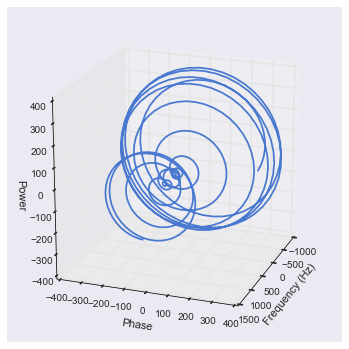

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(EEGtimes,np.real(convolution_result_fft),np.imag(convolution_result_fft))
ax.view_init(20, 20)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Real')
ax.set_zlabel('Imag')
plt.title("")

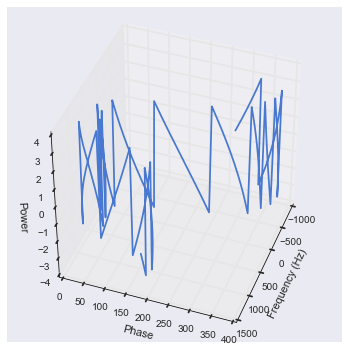

In [13]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(EEGtimes,np.absolute(convolution_result_fft),angle(convolution_result_fft))
ax.view_init(40, 20)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Phase (rad)')
ax.set_zlabel('amplitude')


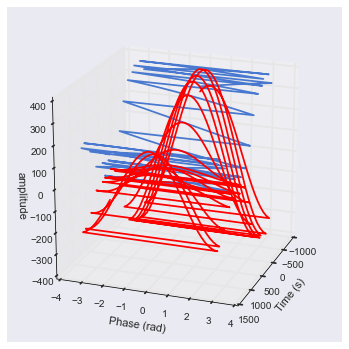

In [15]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(EEGtimes,angle(convolution_result_fft),np.absolute(convolution_result_fft))
ax.plot(EEGtimes,angle(convolution_result_fft),np.real(convolution_result_fft),'r')

ax.view_init(20, 20)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Phase (rad)')
ax.set_zlabel('amplitude')

###Figure 13.10

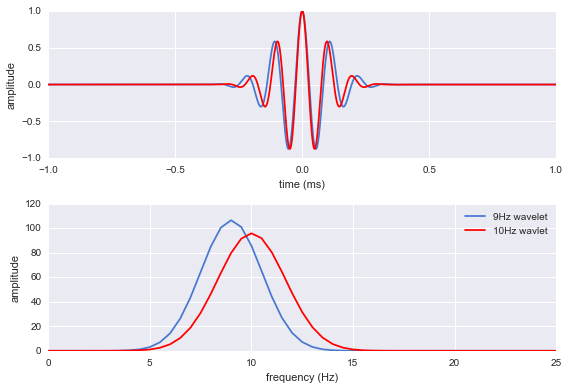

In [27]:
srate = 400.
time = np.arange(-1,1 + 1/srate, 1/srate)

#create 9Hz wavelet
f = 9 #frequency of wavelet in Hz
s = 6/(2*pi*f)
wavelet9 = exp(2*pi*1j*f*time) * exp(-time **2 /(2*s**2))


#create 10Hz wavelet
f = 10 #frequency of wavelet in Hz
s = 6/(2*pi*f)
wavelet10 = exp(2*pi*1j*f*time) * exp(-time **2 /(2*s**2))

plt.subplot(211)
plt.plot(time,np.real(wavelet9))
plt.plot(time,np.real(wavelet10),'r')
plt.xlabel("time (ms)")
plt.ylabel("amplitude")

plt.subplot(212)

hz = np.linspace(0,srate/2,np.floor(len(time)/2.)+1);
fft9 = fft(wavelet9)
fft10 = fft(wavelet10)

plt.plot(hz,np.absolute(fft9[:len(hz)]))
plt.plot(hz,np.absolute(fft10[:len(hz)]),'r')

plt.xlim([0,25])
plt.xlabel("frequency (Hz)")
plt.ylabel("amplitude")
plt.legend(["9Hz wavelet","10Hz wavlet"])
plt.tight_layout()

###Figure 13.11